Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!
  

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df[df==" "].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
df.shape

(1599, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
#the Data has no null value and no blank values,and the data set has 1599 rows and 12 columns(11 are independent variable and 1 is dependent variable)

In [10]:
#Univariant analasys

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

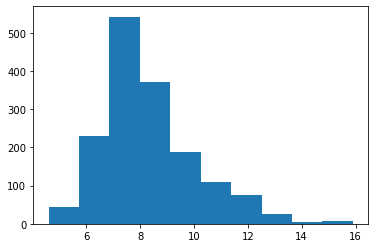

In [12]:
plt.hist(df['fixed acidity'])

(array([ 73., 405., 423., 475., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <BarContainer object of 10 artists>)

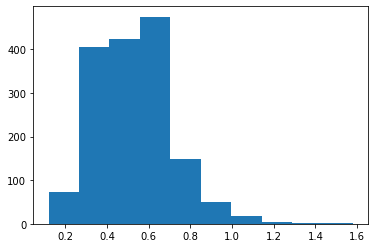

In [13]:
plt.hist(df['volatile acidity'])

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

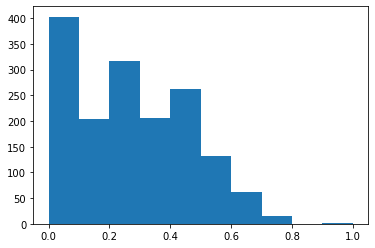

In [14]:
plt.hist(df['citric acid'])

(array([994., 463.,  67.,  45.,  11.,   8.,   3.,   0.,   5.,   3.]),
 array([ 0.9 ,  2.36,  3.82,  5.28,  6.74,  8.2 ,  9.66, 11.12, 12.58,
        14.04, 15.5 ]),
 <BarContainer object of 10 artists>)

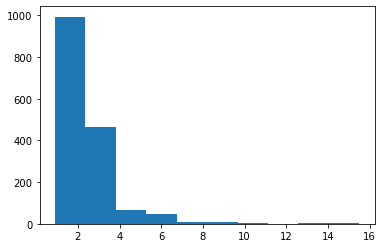

In [15]:
plt.hist(df['residual sugar'])

(array([ 457., 1064.,   35.,   18.,    3.,    8.,   10.,    2.,    0.,
           2.]),
 array([0.012 , 0.0719, 0.1318, 0.1917, 0.2516, 0.3115, 0.3714, 0.4313,
        0.4912, 0.5511, 0.611 ]),
 <BarContainer object of 10 artists>)

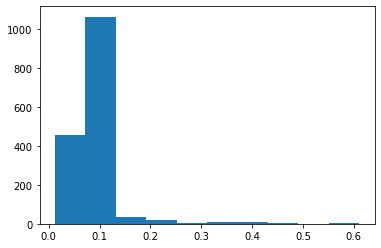

In [16]:
plt.hist(df['chlorides'])

(array([464., 460., 299., 197., 113.,  39.,  11.,  12.,   0.,   4.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

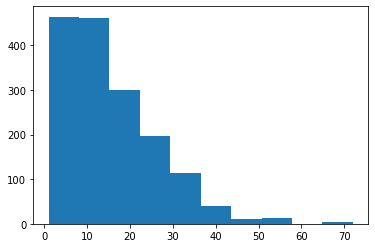

In [17]:
plt.hist(df['free sulfur dioxide'])

(array([730., 471., 221., 113.,  52.,  10.,   0.,   0.,   0.,   2.]),
 array([  6. ,  34.3,  62.6,  90.9, 119.2, 147.5, 175.8, 204.1, 232.4,
        260.7, 289. ]),
 <BarContainer object of 10 artists>)

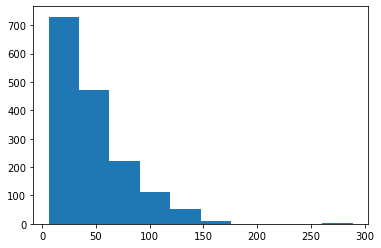

In [18]:
plt.hist(df['total sulfur dioxide'])

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

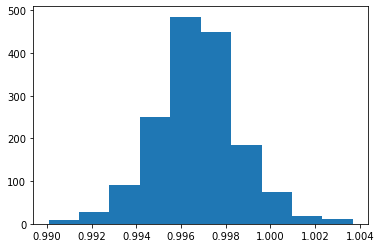

In [19]:
plt.hist(df['density'])

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

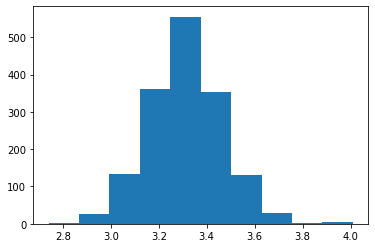

In [20]:
plt.hist(df['pH'])

(array([151., 855., 416., 118.,  32.,  15.,   4.,   4.,   0.,   4.]),
 array([0.33 , 0.497, 0.664, 0.831, 0.998, 1.165, 1.332, 1.499, 1.666,
        1.833, 2.   ]),
 <BarContainer object of 10 artists>)

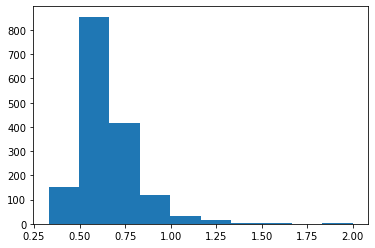

In [21]:
plt.hist(df['sulphates'])

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

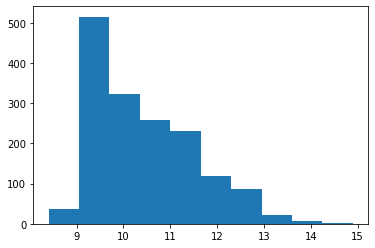

In [22]:
plt.hist(df['alcohol'])

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


C:\Users\RIYAZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

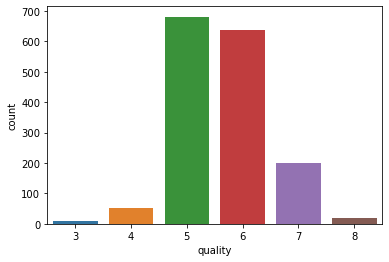

In [23]:
print(df['quality'].value_counts())
sns.countplot(df['quality'])

In [24]:
# Most of the wine sample is lie between 5 and 6 quality(bad) only 217 sample is of good quality

In [25]:

#bivarient analysis 

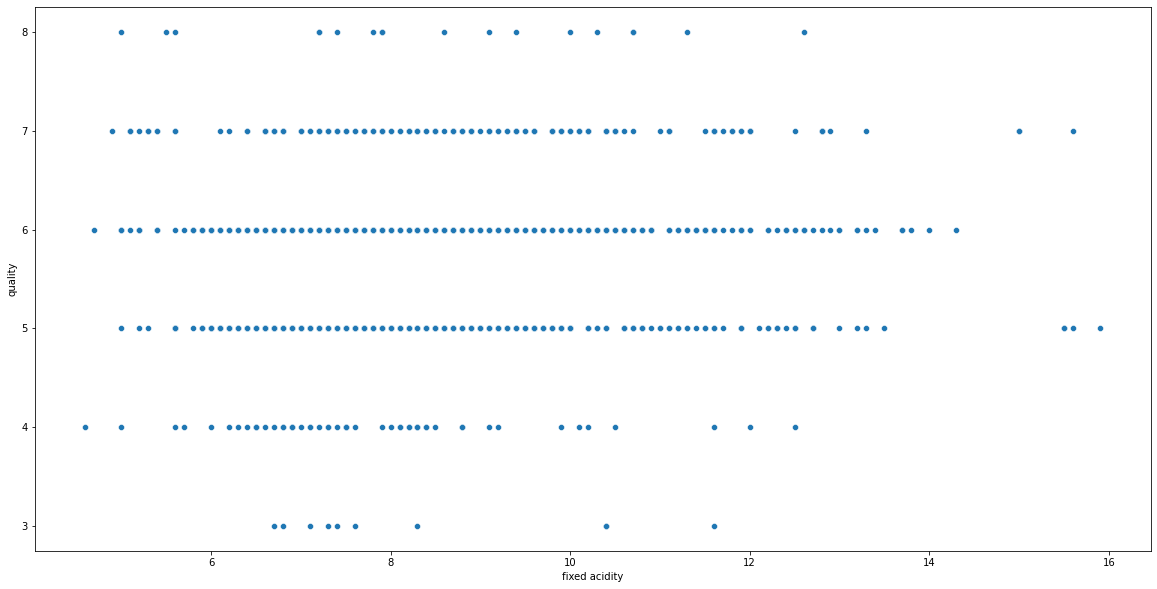

In [26]:

plt.figure(figsize=(20,10))
sns.scatterplot(x='fixed acidity',y='quality',data=df)
plt.show()

#Most of data is lie between quality rage 4 to7 and fixed acidity rage 6 to 14 

It does not seem to be any clear pattern that would indicate a positive or negative relationship between the fixed acidity and quality. 
Some data points are scattered around the low acidity and high quality values but some other data points are scattered over the whole range.

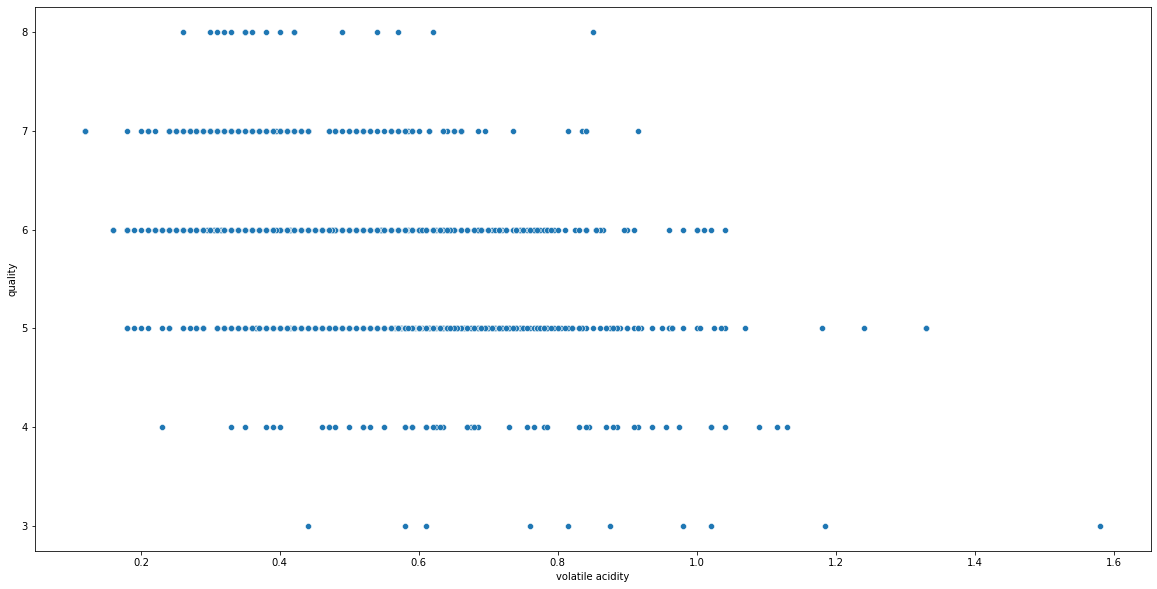

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='volatile acidity',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 
It does seem to be a negative correlation between volatile acidity and quality, with a cluster of points appearing around low volatile acidity values and high quality values. However, there are also data points scattered throughout the entire range of volatile acidity and quality values, which suggests that other factors may be influencing the quality of the wine.

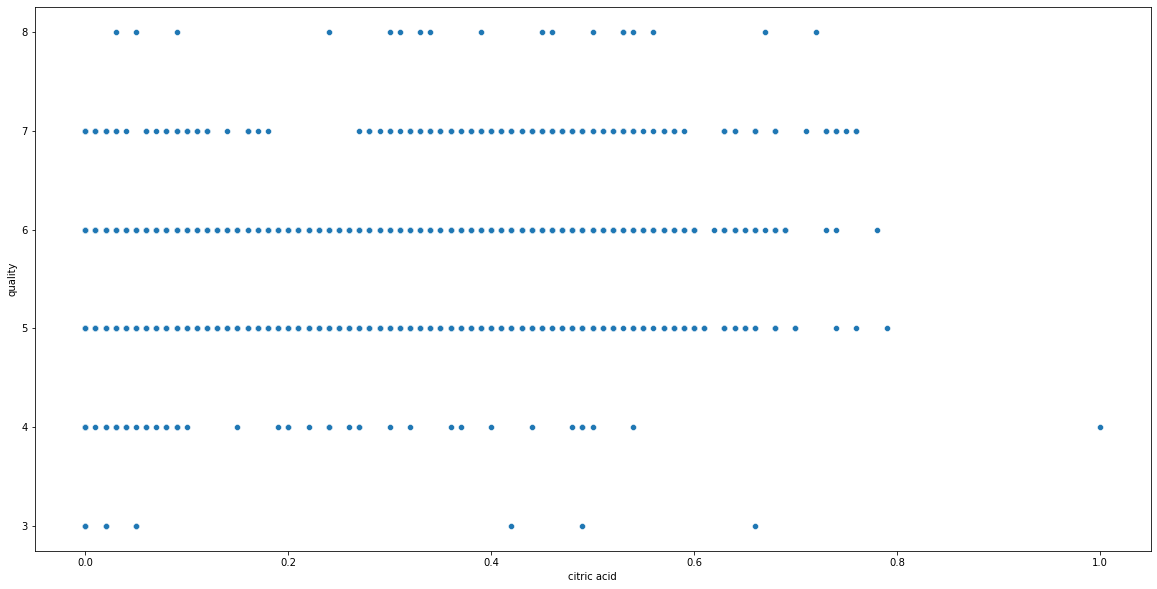

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='citric acid',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

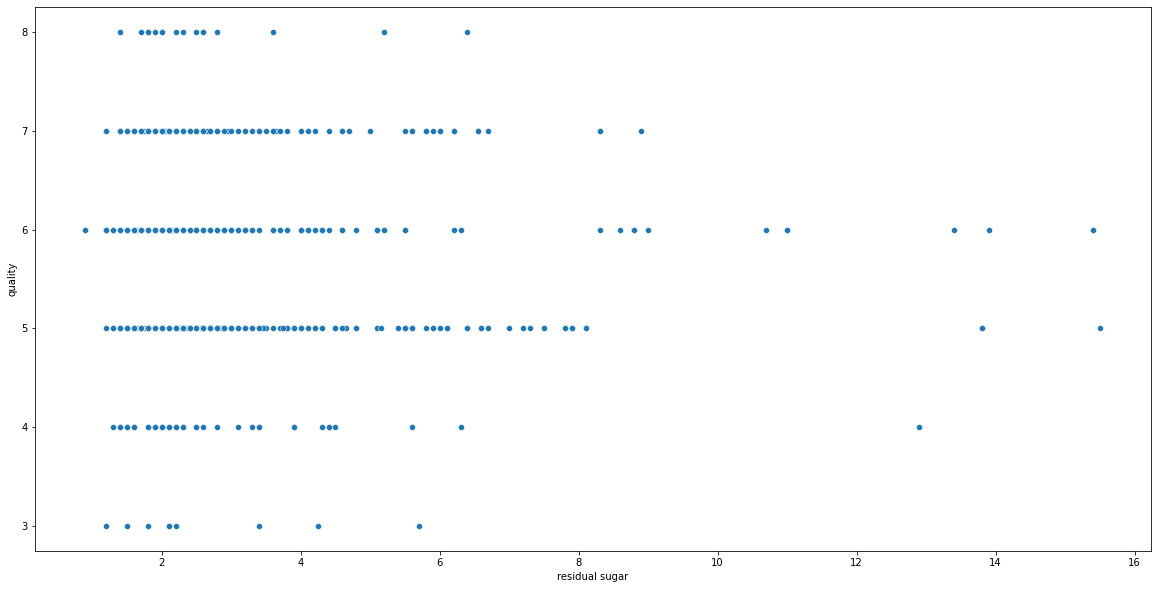

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='residual sugar',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

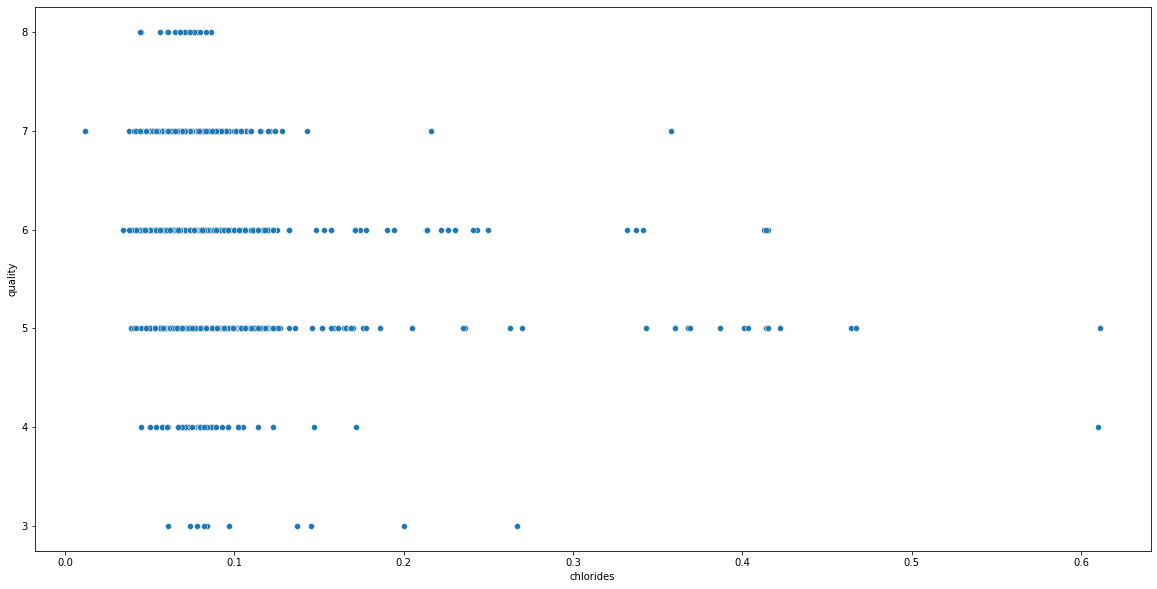

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='chlorides',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

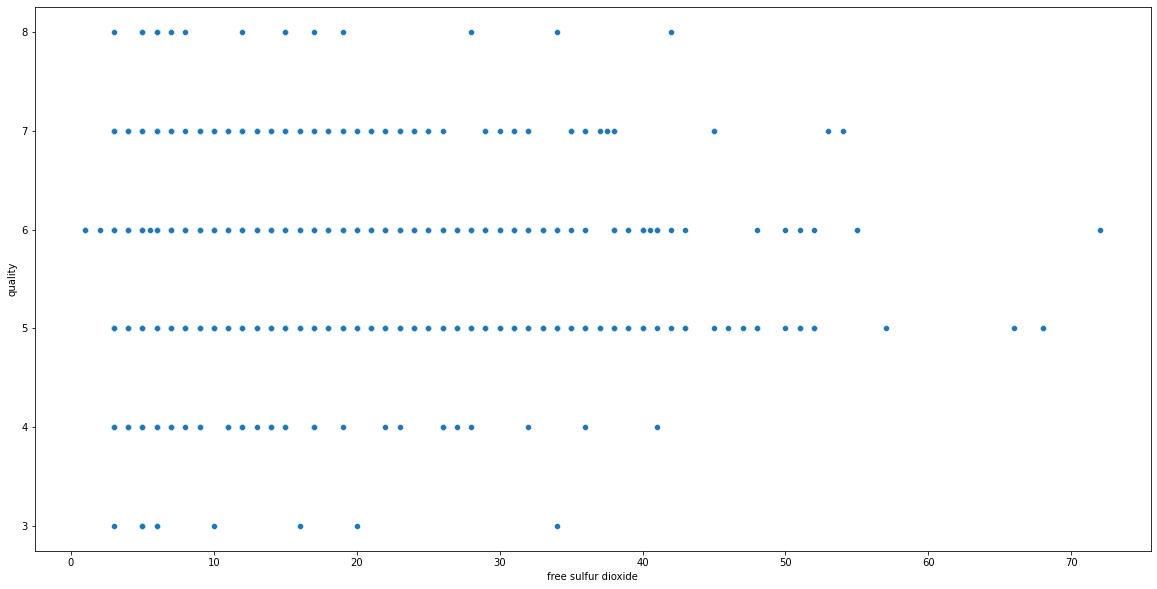

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='free sulfur dioxide',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

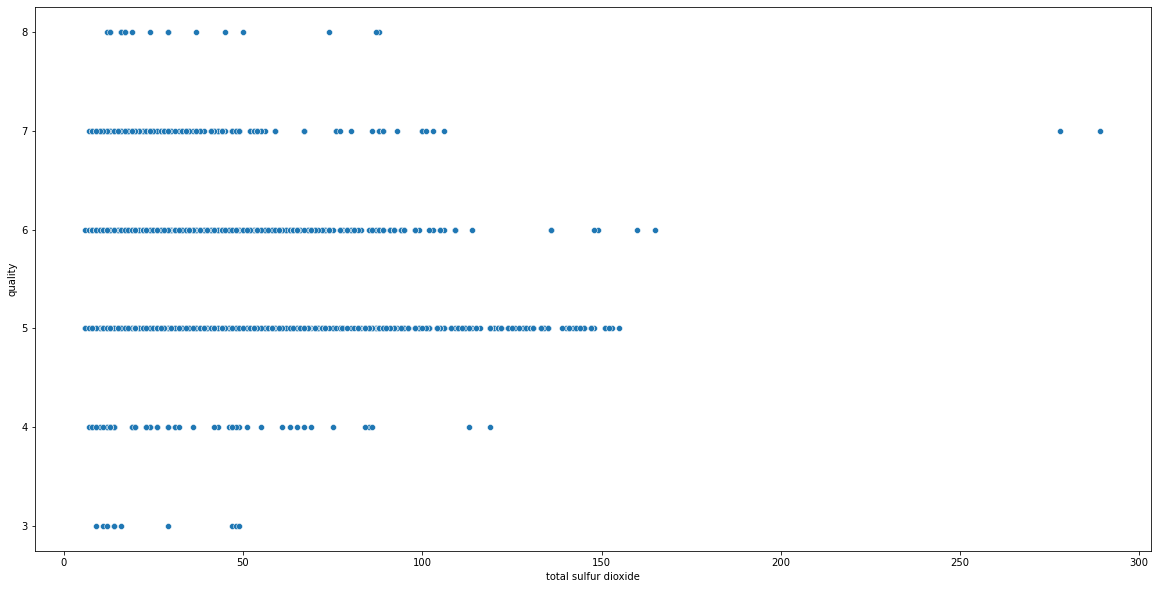

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='total sulfur dioxide',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

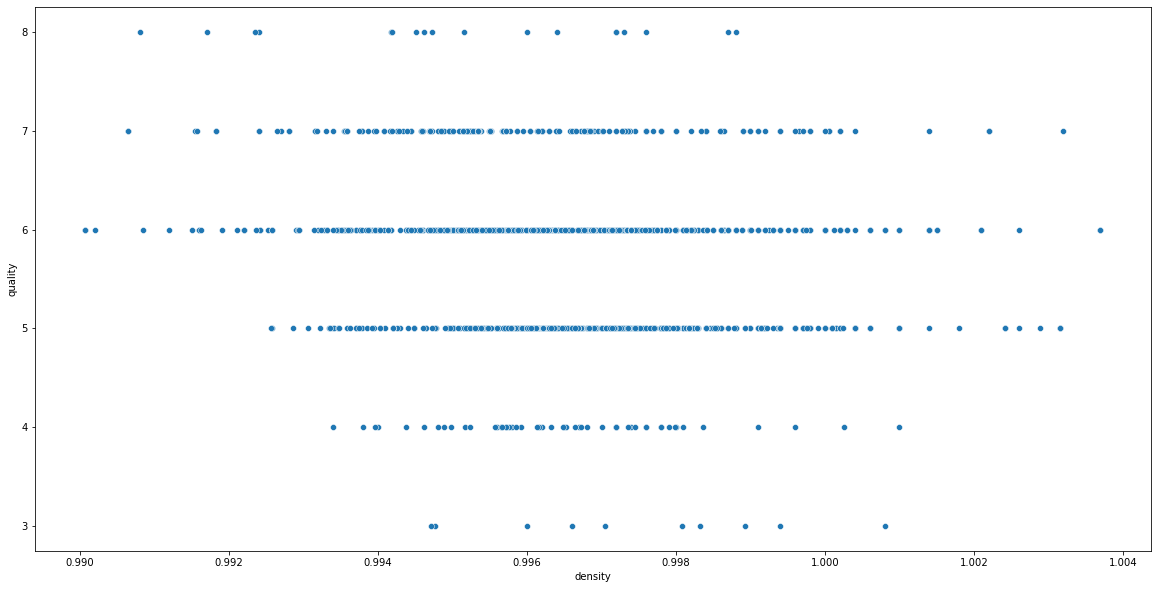

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='density',y='quality',data=df)
plt.show()

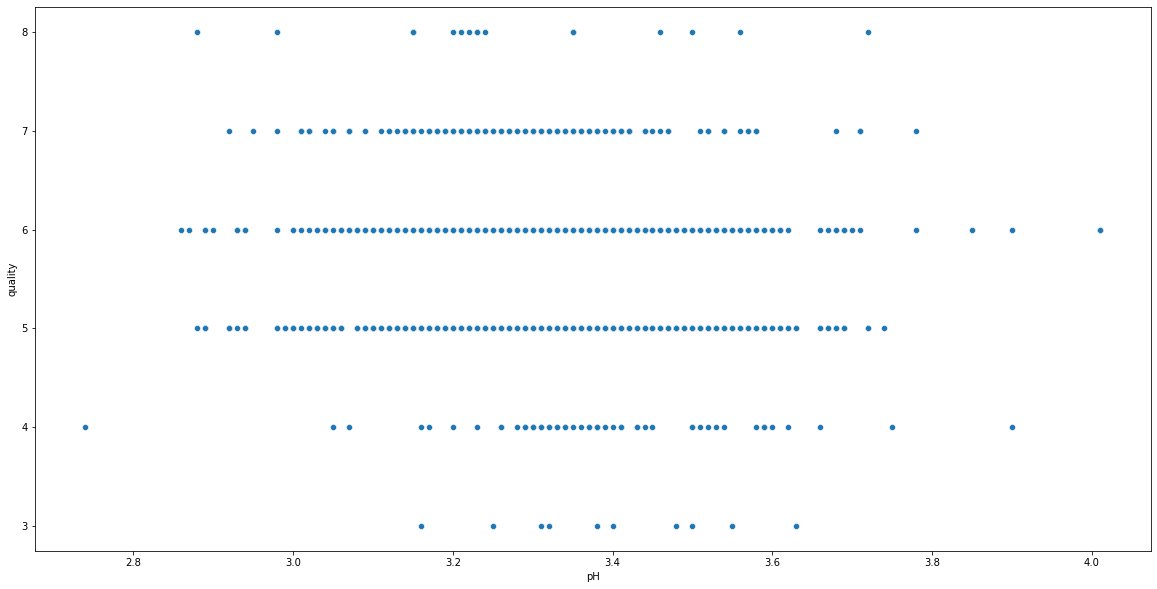

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='pH',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

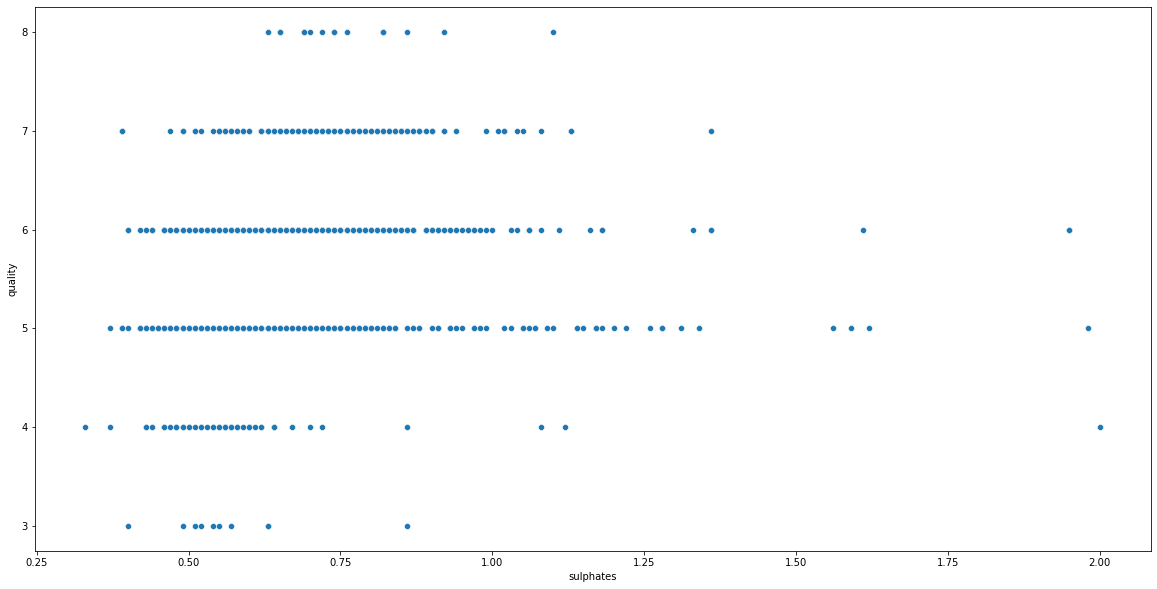

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='sulphates',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

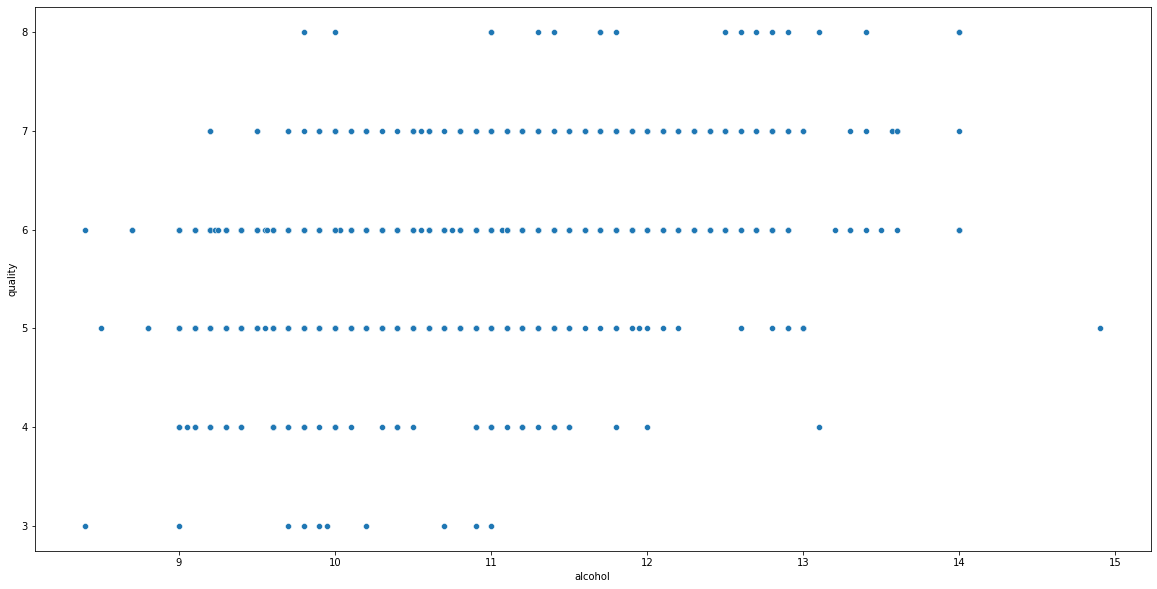

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='alcohol',y='quality',data=df)
plt.show()

As for the relationship, it's a bit hard to say just by looking at the scatter plot. 

now try Some other plots

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

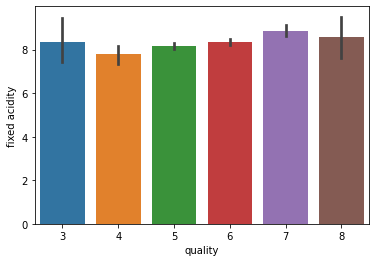

In [37]:
sns.barplot(x='quality',y='fixed acidity',data=df)

In [38]:
#fixed acidity is slightly higher for good qualty wine

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

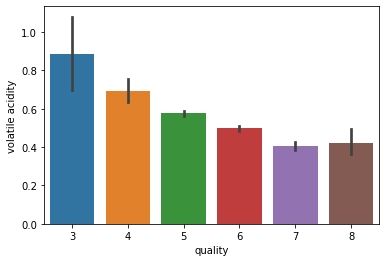

In [39]:
sns.barplot(x='quality',y='volatile acidity',data=df)

volatile acidity is low for good wine and high for low quality wine

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

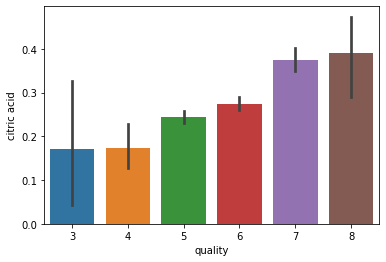

In [40]:
sns.barplot(y='citric acid',x='quality',data=df)

citric acid	is high for high qualty wine and low for low quality wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

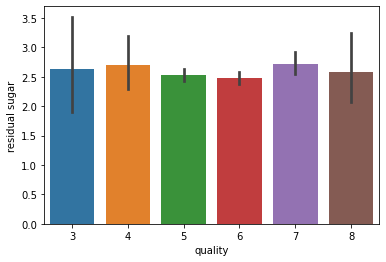

In [41]:
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

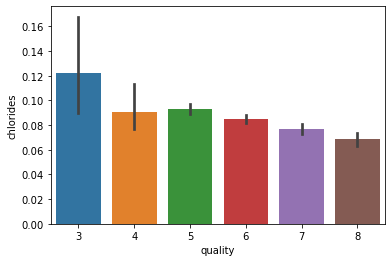

In [42]:
sns.barplot(x='quality',y='chlorides',data=df)

low val of chloride is need for good qulaity wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

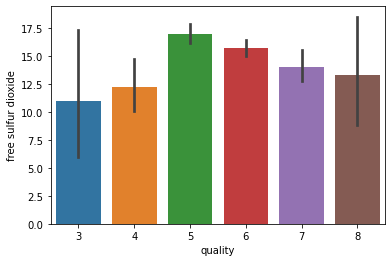

In [43]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

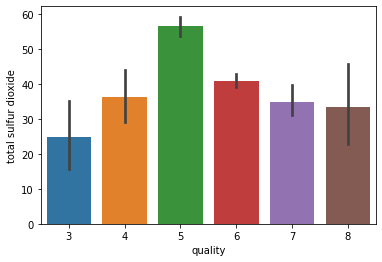

In [44]:
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

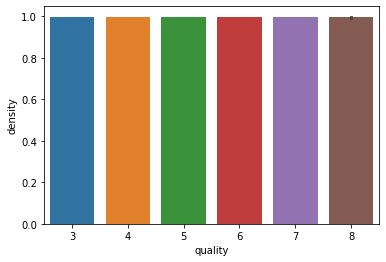

In [45]:
sns.barplot(x='quality',y='density',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

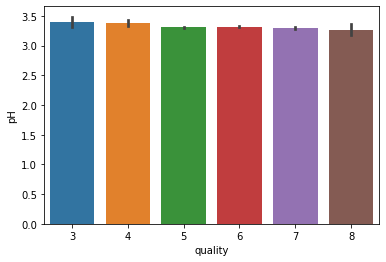

In [46]:
sns.barplot(x='quality',y='pH',data=df)

low pH value is good for good qulatity wine the diffis very low

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

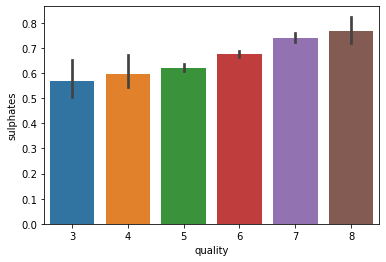

In [47]:
sns.barplot(x='quality',y='sulphates',data=df)

higher vale of sulphate is required for good qualty wine 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

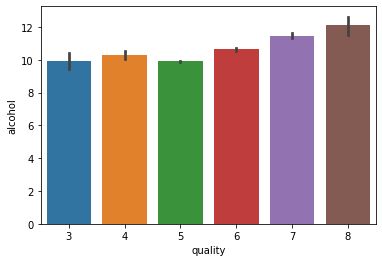

In [48]:
sns.barplot(x='quality',y='alcohol',data=df)

Higer value of alcohal is for good qualtiy wine

In [49]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

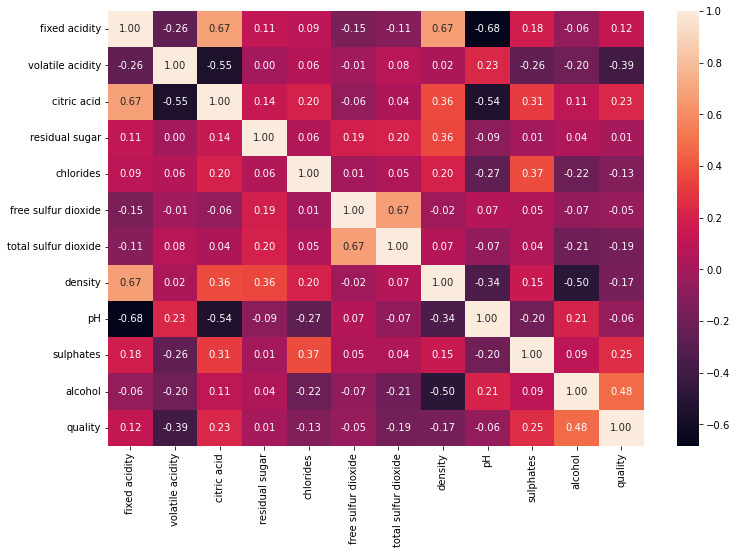

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='0.02f')

#This heatmap will allow you to see the relationship between different features of the wine samples and the quality of the wine. This can be useful in identifying which features are most strongly correlated with the quality of the wine and which features are less important.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

In [51]:
#Dropping a column
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
#Outlier removal
df.shape

(1599, 11)

In [53]:
# Z score method

from scipy.stats import zscore


z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

In [55]:
# Splitting the dataset into 'X' and 'Y' for feature and label

X = df.drop('quality', axis=1)
Y = df['quality']

In [56]:
#Taking care of class imbalance
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [57]:
# adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


In [58]:
#MOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [59]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [60]:
Y # Displaying just the label

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [61]:
#Label Binarization

Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [62]:

X # Displaying all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,9.384456,0.391111,0.505334,1.942228,0.070822,16.000000,0.995079,3.199333,0.682889,12.233322
3116,10.657103,0.604873,0.607601,4.689464,0.084109,18.621825,0.997580,3.216218,0.695673,13.343274
3117,9.445265,0.435143,0.444857,2.555188,0.072689,16.448120,0.995027,3.172406,0.681368,11.941051
3118,9.958138,0.342791,0.464244,5.089529,0.072430,13.854655,0.996751,3.224302,0.782965,12.571512


In [63]:
Creating the training and testing data sets

SyntaxError: invalid syntax (1786519246.py, line 1)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
# import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [65]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)



I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [66]:
# Machine Learning Model for Classification and Evaluation Metrics

In [67]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [68]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


C:\Users\RIYAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RIYAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy Score: 89.90384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       391
           1       0.86      0.88      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.43589743589745

Accuracy Score - Cross Validation Score is 2.4679487179487154


C:\Users\RIYAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RIYAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [69]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 90.38461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       391
           1       0.86      0.88      0.87       233

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.01923076923077

Accuracy Score - Cross Validation Score is 3.365384615384613


In [70]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.46794871794873

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       391
           1       0.87      0.94      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.92      0.93       624

Cross Validation Score: 89.29487179487181

Accuracy Score - Cross Validation Score is 3.17307692307692


In [71]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.67307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.93      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.11538461538463

Accuracy Score - Cross Validation Score is 3.5576923076923066


In [72]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 87.33974358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       391
           1       0.83      0.84      0.83       233

    accuracy                           0.87       624
   macro avg       0.86      0.87      0.87       624
weighted avg       0.87      0.87      0.87       624

Cross Validation Score: 84.32692307692307

Accuracy Score - Cross Validation Score is 3.012820512820525


In [73]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.31410256410257

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.94      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.58974358974359

Accuracy Score - Cross Validation Score is 2.724358974358978


In [74]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.99358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.24358974358975

Accuracy Score - Cross Validation Score is 3.75


In [75]:
#Hyper parameter tuning on the best ML Mode

# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [76]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [ ]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})


In [ ]:
GSCV.best_params_

In [ ]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.50641025641025
I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

In [ ]:
#AUC ROC Curve

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [ ]:
ROC Curve for my final model and it shows the AUC score for my final model to be of 98%

In [ ]:
#Confusion Matrix

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

In [ ]:
Saving the model

filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)